# Dateien, Dateiformate und Persistenz

Ein Computerprogramm hat seinen Platz im Arbeitsspeicher.
Das ist ein schneller, aber vergänglicher Ort um Daten abzulegen.
Möchte man 

* Ergebnisse einer Berechnung speichern,
* existierende Daten einlesen,
* oder Berechnungen zwischenspeichern

braucht es weiterer Technologien, um die Daten aus dem Arbeitsspeicher z.B. auf die Festplatte oder in einer Datenbank zu speichern und später von dort wieder einzulesen.

Der Überbegriff für jegliches Speichern von Daten in einer Datei ist [Serialisierung](http://de.wikipedia.org/wiki/Serialisierung).
Die Daten des Programmes werden hierbei kodiert und als lineare Sequenz von Bits&Bytes abgelegt.
Im folgenden werden einige solcher Formate vorgestellt und kurz erklärt,
wie sie mit Python gelesen bzw. geschrieben werden können.

## Dateien

* Ein **Byte** ist die kleinste Speichereinheit und umfasst 8 Bits (Wahr oder Falsch Werte).
* Eine **Datei** ist ein Vektor von Bytes (ganz ähnlich wie ein String, bzw. byte-Vektor in Python 3).
* Dateien werden auf der Festplatte des Computers gespeichert, wobei diese Byte-Vektoren durch physikalische Techniken (Magentismus, Feldeffekttransistoren, Kerr-Effekt, etc.) so abgelegt werden, dass sie auch ohne Stromzufuhr erhalten bleiben und später wieder ausgelesen werden können.
* Daher werden Festplatten für die
  <a href="http://en.wikipedia.org/wiki/Persistence_(computer_science)">Persistenz</a> von Information verwendet.

## Dateisystem & Verzeichnisse

Da es ist in der Praxis sehr mühsam wäre die exakte Speicherpositionen jeder einzelnen Datei auf der Festplatte zu wissen, gibt es [**Dateisysteme**](http://en.wikipedia.org/wiki/File_system) ([POSIX Standard](http://en.wikipedia.org/wiki/POSIX)).
Ein Dateisystem (wie z.B. EXT4, btrfs, ZFS oder NTFS)
ist eine Strukturierung der Festplatte (oder einer darin definierten Partition),
um anhand eines generischen [**Pfades**](http://en.wikipedia.org/wiki/Path_%28computing%29) die Datei zu finden.
Auch merkt sich das Dateisystem die Größe der Datei
(neben anderen Informationen wie Zugriffszeit und Berechtigungen)
und erlaubt damit das einfache Auslesen der gesamten darin gespeicherten Daten. Beispiel:

    /home/joe/documents/thesis.tex

Solch ein Pfad besteht zur besseren Strukturierung aus einer Verzeichnisstruktur und einem Dateinamen.
Diese Verzeichnisse können verschachtelt sein und sind mit einem Schrägstrich "`/`" getrennt.
`/home/joe/documents` ist das Verzeichnis zu Joe's Dokumenten,
wo er seine Dissertation unter dem Dateinamen `thesis.tex` gespeichert hat.
(Windows verwendet übrigens ebenfalls ein POSIX kompatibles Dateisystem mit einem `/`,
verwendet aber im Interface des Benutzers einen Backslash "\"
-- der normalerweise [zum Escapen](http://en.wikipedia.org/wiki/Escape_character) verwendet wird
-- und Bildet daher eine Ausnahme).

Die Dateiendung `tex` ist übrigens ein Hinweis darauf, dass es sich um eine $\LaTeX$ Datei handeln wird.
Es könnte jedoch auch etwas anderes darin gespeichert sein...

Im folgenden Beispiel wird eine Datei `verfassung.md` aus dem Unterverzeichnis "`res`" dieses Skriptums eingelesen.
Damit dies Betriebssystemunabhängig funktioniert,
wird `os.path.join` für das Zusammenfügen des Dateipfades verwendet:

Regel: **Immer** `os.path.join` statt expliziter Pfade verwenden!

In [8]:
import os
filename = os.path.join("res", "verfassung.md")
filename

'res/verfassung.md'

## Text-Datei

Es handelt sich in diesem ersten Beispiel um eine Text-Datei.
Das heißt, die darin gespeicherten Bytes stehen für Buchstaben und Zahlen im Alphabet, einigen Interpunktionszeichen und Steuerzeichen (neue Zeile, etc.).
Da ein Byte 8 Bit hat, können dadurch nur maximal $2^8 = 256$ Zeichen kodiert werden.

Beispiel: Die Binärzahl "`01000001`" ist der Buchstabe "`A`".

In [9]:
chr(int("01000001", 2))

'A'

Das historisch erste durchgängig verwendete Kodierungsalphabet ist [ASCII](http://en.wikipedia.org/wiki/ASCII).
Ein kurzer Blick reicht jedoch um zu sehen, dass es hier keine Umlaute gibt.
Auch ist in diesen 256 Zeichen kein Platz für Schriftzeichen aus vielen anderen Sprachen.

Daher gibt es modernere Kodierungen wie [UTF-8](http://en.wikipedia.org/wiki/UTF-8) (und verwandte) um alle Schriftzeichen kodieren zu können.

Im folgenden werden nun die Byte-Daten dieser Text-Datei
mittels der in Python eingebauten Funktion `open` eingelesen.
Es öffnet zuerst die Datei (und gibt einen File-Handler zurück) und
dann liest die Methode `.read()` die Byte-Daten ein:

In [10]:
filehandler = open(filename)
filehandler

<_io.TextIOWrapper name='res/verfassung.md' mode='r' encoding='UTF-8'>

In [11]:
filedata = filehandler.read()
filedata

'## Bundes-Verfassungsgesetz\n\n### Allgemeine Bestimmungen. Europäische Union\n\n**Artikel 1.**\n\nÖsterreich ist eine demokratische Republik. Ihr Recht geht vom Volk aus.\n\n**Artikel 2.**\n\n1. Österreich ist ein Bundesstaat.\n2. Der Bundesstaat wird gebildet aus den selbständigen Ländern: Burgenland, Kärnten, Niederösterreich, Oberösterreich, Salzburg, Steiermark, Tirol, Vorarlberg, Wien.\n3. Änderungen im Bestand der Länder oder eine Einschränkung der in diesem Absatz und in Art. 3 vorgesehenen Mitwirkung der Länder bedürfen auch verfassungsgesetzlicher Regelungen der Länder.\n\n**Artikel 3.**\n\n1. Das Bundesgebiet umfasst die Gebiete der Bundesländer.\n2. Staatsverträge, mit denen die Bundesgrenzen geändert werden, dürfen nur mit Zustimmung der betroffenen Länder abgeschlossen werden.\n3. Grenzänderungen innerhalb des Bundesgebietes bedürfen übereinstimmender Gesetze des Bundes und der betroffenen Länder. Für Grenzbereinigungen innerhalb des Bundesgebietes genügen übereinstimmen

In einem eigenständigen Programm wird üblicherweise anschließend die Datei wieder mittels `.close()` geschlossen:

In [12]:
filehandler.close()

Wie man sieht, beinhaltet die Datei Text und ein paar extra Zeichen.

* "`\n`" ist eine Zeilenumbruch
* "`\xNN`" sind hexadezimale Werte für [UTF-8 kodierte Buchstaben](http://en.wikipedia.org/wiki/UTF-8)
  (in unserem Fall der deutschen Sprache sind das Umlaute usw.)
  Das rührt daher, dass beim Erstellen dieser Textdatei diese Soderzeichen genau nach dieser UTF-8 Kodierung 
  geschrieben wurden. Beispiel:

In [13]:
print('\xc3\xa4')

Ã¤


* Zwischendurch gibt es auch [Markdown Steuerzeichen](http://en.wikipedia.org/wiki/Markdown) zur Formatierung des Textes.

Hier nun eine "bessere" (also, für den Menschen lesbarere Art) wie die Daten dieser Datei dargestellt werden können:

1. `filedata.decode("utf8")` dekodiert die UTF-8 Kodierung und
1. IPython's Markdown parser liest den dekodierten Text ein und konvertiert auf HTML (welches dann hier angezeigt wird bzw. im PDF wird dieses Markdown anschließend auch noch nach LaTeX übersetzt)

In [16]:
from IPython.display import Markdown, display
display(Markdown(filedata))

## Bundes-Verfassungsgesetz

### Allgemeine Bestimmungen. Europäische Union

**Artikel 1.**

Österreich ist eine demokratische Republik. Ihr Recht geht vom Volk aus.

**Artikel 2.**

1. Österreich ist ein Bundesstaat.
2. Der Bundesstaat wird gebildet aus den selbständigen Ländern: Burgenland, Kärnten, Niederösterreich, Oberösterreich, Salzburg, Steiermark, Tirol, Vorarlberg, Wien.
3. Änderungen im Bestand der Länder oder eine Einschränkung der in diesem Absatz und in Art. 3 vorgesehenen Mitwirkung der Länder bedürfen auch verfassungsgesetzlicher Regelungen der Länder.

**Artikel 3.**

1. Das Bundesgebiet umfasst die Gebiete der Bundesländer.
2. Staatsverträge, mit denen die Bundesgrenzen geändert werden, dürfen nur mit Zustimmung der betroffenen Länder abgeschlossen werden.
3. Grenzänderungen innerhalb des Bundesgebietes bedürfen übereinstimmender Gesetze des Bundes und der betroffenen Länder. Für Grenzbereinigungen innerhalb des Bundesgebietes genügen übereinstimmende Gesetze der betroffenen Länder.
4. Sofern es sich nicht um Grenzbereinigungen handelt, bedürfen Beschlüsse des Nationalrates über Grenzänderungen gemäß Abs. 2 und 3 der Anwesenheit von mindestens der Hälfte der Mitglieder und einer Mehrheit von zwei Dritteln der abgegebenen Stimmen.


---

Nun ist es viel einfacher zu lesen!

Hier noch eine zweite Variante, wie UTF-8 kodierter Text besser eingelesen werden kann.
Das Modul "[`codecs`](https://docs.python.org/2/library/codecs.html)"
stellt ebenfalls eine `open` Funktion bereit,
welcher man gleich direkt angeben kann, dass es sich um UTF-8 kodierten Text handelt.
Anschließend kann die Datei ohne Dekodierungsschritt eingelesen und dargestellt werden.

Hinweis: UTF-8 ist weit verbreitet, wird von so gut wie allen Webseiten verwendet
und eigentlich der Standard schlechthin.
Es gibt jedoch noch andere Textformatierungen,
z.B. in Windows "Westeuropäisch" mit Codepage "`cp1140`" bzw. "`iso-8859-1[5]`".

### with statement

Außerdem erweist es sich in der Praxis als sehr nützlich,
mittels [with statement](https://docs.python.org/2/reference/compound_stmts.html#with)
```python
with ... as x:
    do_something_with(x)
```
einen [Kontext](https://docs.python.org/2/reference/datamodel.html#context-managers)
für die geöffnete Datei erzeugt.
Der große Vorteil ist, dass bei Verlassen dieses Kontexts die Datei automatisch geschlossen wird (auch dann, wenn es zu einer Exception kommt).

Regel: Lesen und Schreiben von Dateien im allgmeinen **immer** mit `with`-Kontexten.

In [17]:
from codecs import open as copen
with copen(filename, "r", "utf8") as verfassung:
    text = verfassung.read()
    display(Markdown(text))

## Bundes-Verfassungsgesetz

### Allgemeine Bestimmungen. Europäische Union

**Artikel 1.**

Österreich ist eine demokratische Republik. Ihr Recht geht vom Volk aus.

**Artikel 2.**

1. Österreich ist ein Bundesstaat.
2. Der Bundesstaat wird gebildet aus den selbständigen Ländern: Burgenland, Kärnten, Niederösterreich, Oberösterreich, Salzburg, Steiermark, Tirol, Vorarlberg, Wien.
3. Änderungen im Bestand der Länder oder eine Einschränkung der in diesem Absatz und in Art. 3 vorgesehenen Mitwirkung der Länder bedürfen auch verfassungsgesetzlicher Regelungen der Länder.

**Artikel 3.**

1. Das Bundesgebiet umfasst die Gebiete der Bundesländer.
2. Staatsverträge, mit denen die Bundesgrenzen geändert werden, dürfen nur mit Zustimmung der betroffenen Länder abgeschlossen werden.
3. Grenzänderungen innerhalb des Bundesgebietes bedürfen übereinstimmender Gesetze des Bundes und der betroffenen Länder. Für Grenzbereinigungen innerhalb des Bundesgebietes genügen übereinstimmende Gesetze der betroffenen Länder.
4. Sofern es sich nicht um Grenzbereinigungen handelt, bedürfen Beschlüsse des Nationalrates über Grenzänderungen gemäß Abs. 2 und 3 der Anwesenheit von mindestens der Hälfte der Mitglieder und einer Mehrheit von zwei Dritteln der abgegebenen Stimmen.


---

Bislang wurde immer die `.read()` Methode des File-Handlers verwendet,
um die gesamte Datei einzulesen.
Handelt es sich um sehr große Dateien, passen sie nicht mehr in den Arbeitsspeicher oder verlangsamen die Verarbeitung.
Daher gibt es z.B. die Möglichkeit, eine Textdatei Zeilenweise einzulesen oder immer nur Blockweise.

* `.read(<Anzahl Bytes>)`
* `.readlines()` iteriert über die Zeilen

Einlesen der ersten 10  und dann 20 Bytes

In [18]:
with open(filename) as verfassung:
    print("10 bytes:         %r" % verfassung.read(10))
    print("weitere 20 bytes: %r" % verfassung.read(20))

10 bytes:         '## Bundes-'
weitere 20 bytes: 'Verfassungsgesetz\n\n#'


Um zwischendurch wieder an den Anfang der Datei zu springen, gibt es die `.seek(0)` Methode:

Einlesen der ersten 10 Zeilen mittels `.readlines()`, welches beim Iterieren in einer `for`-Schleife auch automatisch aufgerufen werden würde:

In [19]:
with copen(filename, "r", "utf8") as verfassung:
    for line_number, line in enumerate(verfassung.readlines()):
        print(u"Zeile %2d: %s" % (line_number, line[:-1]))
        if line_number >= 10:
            break

Zeile  0: ## Bundes-Verfassungsgesetz
Zeile  1: 
Zeile  2: ### Allgemeine Bestimmungen. Europäische Union
Zeile  3: 
Zeile  4: **Artikel 1.**
Zeile  5: 
Zeile  6: Österreich ist eine demokratische Republik. Ihr Recht geht vom Volk aus.
Zeile  7: 
Zeile  8: **Artikel 2.**
Zeile  9: 
Zeile 10: 1. Österreich ist ein Bundesstaat.


## Schreiben einer Datei

Bislang haben wir uns ausschließlich mit dem Einlesen einer Datei beschäftigt.
Das Schreiben läuft ganz ähnlich ab:

1. File-Handler für eine Datei, aber mit dem **Modus "w" für "write"** (statt "r" für "read").
   (sollen Binärdaten geschrieben werden, gibt es auch "wb").
   Für Textdateien am besten **`codecs.open("...", "w", "utf8")`**.
2. Die Methode `.write(...)` des File-Handlers.
3. Abschließen der Schreibvorgangs durch `.close()` bzw. innerhalb eines `with`-Kontexts arbeiten.

Hinweis: Im Unterschied zur Verwendung des `print` Statements oder Funktion, muss ein Zeilenumbruch explizit mit "`\n`" eingefügt werden.

In [20]:
import os, codecs
filename = os.path.join("res", "textdatei.txt")

with codecs.open(filename, "w", "utf8") as outfile:
    from math import log
    outfile.write("Die Berechneten Werte\n")
    outfile.write("  x: %10s %12s\n" % ("f(x)", "lg(f(x))"))
    for i in range(1,11):
        fx = (i + i**5) / 3.
        outfile.write("%3d: %10.2f %12.2f\n" % (i, fx, log(fx, 10)))
    outfile.write("ENDE")

Anschließendes Einlesen dieser Datei um zu sehen, was gerade passiert ist:

In [21]:
with codecs.open(filename, "r") as infile:
    print(infile.read())

Die Berechneten Werte
  x:       f(x)     lg(f(x))
  1:       0.67        -0.18
  2:      11.33         1.05
  3:      82.00         1.91
  4:     342.67         2.53
  5:    1043.33         3.02
  6:    2594.00         3.41
  7:    5604.67         3.75
  8:   10925.33         4.04
  9:   19686.00         4.29
 10:   33336.67         4.52
ENDE


## Strukturierte Dateien

Neben Textdokumenten, die verwirrenderweise auch mit Text-Formatierungen strukturiert sein können aber trotzdem  unstrukturiert sind, gibt es eine Vielzahl von Dateien mit einem klar definierten "Format" zur Strukturierung.

NB: Text-Formatierungen sind hierbei "normale" Buchstaben oder "Befehle",
die eine besondere Bedeutung erhalten -- z.B. "fett" oder "Aufzählung".

Das "Format" einer strukturierten Daten ist viel genauer und strenger:
Es legt Regeln für die gesamte Datei fest,
so wie z.B. die Programmiersprache Python für den gesamten geschriebenen Code genaue Linguistische Regeln festlegt.

## Python Pickle

[Python Pickles](https://docs.python.org/2/library/pickle.html)
sind eine für Python spezifische Technik,
Daten eines Objektes zu speichern.
Der Vorteil ist, dass es sehr schnell und speicherplatsparend funktioniert.
Die Nachteile sind, dass dies eine rein Python spezifische Lösung ist und
zum Laden des pickles wird genau die richtige Klasse (mit derselben Struktur) benötigt.

In [32]:
from os.path import join
import pickle

In [33]:
class Data(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
d1 = Data(a = "this is value a", b = [2, 2, 31])
print(id(d1))

139647668062304


Es ist immer eine gute Idee, das Protokoll auf die aktuellste Version zu stellen.
Standardmäßig wird immer die niedrigste (und viel schlechtere) Variante genommen,
um rückwärskompatibel zu sein.

In [34]:
pickle_fn = join("res", "data.pickle")
with open(pickle_fn, "wb") as  pickle_file:
    pickle.dump(d1, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

Nun wird die Klasse wieder geladen, in `d2` statt `d1`, und gelesen.
Man sieht, die Klasse ist rekonstruiert worden, die Daten sind verfügbar, und die Speicheradresse ist eine andere.

In [35]:
d2 = pickle.load(open(pickle_fn))
print("{} {}".format(type(d2), id(d2)))
d2.a, d2.b

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

### CSV: Comma-Separated-Values

Dies ist ein sehr einfaches, rein textbasiertes Format.
Es handelt sich um spatenweise angeordnete Daten in Form einer Tabelle,
wobei Spaten durch "`,`", "`;`" oder Tabulator "\t" getrennt werden.
Die erste Zeile ist üblicherweise eine Beschriftung der Spalten,
darunter ein Eintrag pro Zeile.
Strings werden üblicherweise in Anführungszeichen gestellt,
insbesondere um Verwechslungen mit dem trennenden Zeichen zu vermeiden.
Dokumentation: [Python CSV](https://docs.python.org/2/library/csv.html)

Achtung: Es gibt keine Typeninformation! Daher sind Zahlen Strings und müssen vorsichtig konvertiert werden.

In [36]:
from os.path import join
flugzeit_csv = join("res", "flugzeit.csv")

IPython's `%%writefile`-magic Funktion schribt in die Datei `flugzeit_csv` den hier angegebenen Text.

In [37]:
%%writefile $flugzeit_csv
origin,destination,time,distance
VIE,LHR,2:30,1100
VIE,JFK,8:59,6823
JFK,ZCL,4:39,3346
SFO,JFK,5:30,4162
PEK,ZRH,10:55,7993
HNL,YOW,10:08,7758
VIE,BER,1:09,676
CDG,TIP,3:01,2019
CDG,ATZ,4:47,3453
CDG,FCO,1:52,1102
VIE,FCO,1:28,780
LIS,AMM,5:39,4138
LIS,BER,3:22,2307
LIS,WAW,3:55,2754
PEK,SVO,7:43,5811
BRN,HUU,13:20,10331

Overwriting res/flugzeit.csv


Die Datei wird geöffnet und mittels der [`csv.reader`](https://docs.python.org/2/library/csv.html) Methode eingelesen, wobei als Trennzeichen der "," angegeben wird.

In [38]:
import csv
with open(flugzeit_csv) as fzeit:
    for line in csv.reader(fzeit, delimiter=","):
        print line

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-38-ec0867cc2010>, line 4)

Wie man sieht, Python's `csv` modul hat die Datei mühelos lesen können.
Einzig das Trennzeichen musste gesetzt werden.
Jede Zeile ist eine `list` von `str` Objekten.
Die Zahlen müssten für eine weitere Verarbeitung umgewandelt werden.

### CSV mittels Pandas

Pandas kann DatenFrames von CSV Tabellen einlesen.
Dabei werden die Datentypen (wenn möglich) automatisch konvertiert
und es lassen sich Header und Indices genauer angeben.
[Pandas' `from_csv` Dokumentation](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In diesem gegebenen Fall wird wieder der Strichpunkt als Trennzeichen angegeben
und keine der Spalten als Index definiert.

In [39]:
import pandas as pd
flighttimes = pd.DataFrame.from_csv(flugzeit_csv, sep=",", index_col=None)
flighttimes

,origin,destination,time,distance
0,VIE,LHR,2:30,1100
1,VIE,JFK,8:59,6823
2,JFK,ZCL,4:39,3346
3,SFO,JFK,5:30,4162
4,PEK,ZRH,10:55,7993
5,HNL,YOW,10:08,7758
6,VIE,BER,1:09,676
7,CDG,TIP,3:01,2019
8,CDG,ATZ,4:47,3453
9,CDG,FCO,1:52,1102


Die `time` Spalte wird nun explizit mit einer Parserfunktion `hm_time`
in Stunden konvertiert und als neue Spalte `time2` eingeführt.

In [40]:
def hm_time(entry):
    h, m = entry.split(":")
    return int(h) + int(m) / 60.

flighttimes["time2"] = flighttimes.time.apply(hm_time)
flighttimes

,origin,destination,time,distance,time2
0,VIE,LHR,2:30,1100,2.500000
1,VIE,JFK,8:59,6823,8.983333
2,JFK,ZCL,4:39,3346,4.650000
3,SFO,JFK,5:30,4162,5.500000
4,PEK,ZRH,10:55,7993,10.916667
5,HNL,YOW,10:08,7758,10.133333
6,VIE,BER,1:09,676,1.150000
7,CDG,TIP,3:01,2019,3.016667
8,CDG,ATZ,4:47,3453,4.783333
9,CDG,FCO,1:52,1102,1.866667


In [41]:
# maximum overall distance
flighttimes.ix[flighttimes.distance.argmax()]

origin             BRN
destination        HUU
time             13:20
distance         10331
time2          13.3333
Name: 15, dtype: object

In [42]:
# maximum distance, for each origin
for group, subdf in flighttimes.groupby("origin"):
    m = flighttimes.ix[subdf.distance.argmax()]
    print("Maximum distance from %s: %5d km to %s" % (group, m.distance, m.destination))

Maximum distance from BRN: 10331 km to HUU
Maximum distance from CDG:  3453 km to ATZ
Maximum distance from HNL:  7758 km to YOW
Maximum distance from JFK:  3346 km to ZCL
Maximum distance from LIS:  4138 km to AMM
Maximum distance from PEK:  7993 km to ZRH
Maximum distance from SFO:  4162 km to JFK
Maximum distance from VIE:  6823 km to JFK


Zur Auflockerung eine grafische Darstellung der Weg-Zeit Abhängigkeit.
Wenig Überraschend, es ist direkt proportional!

In [43]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,7)

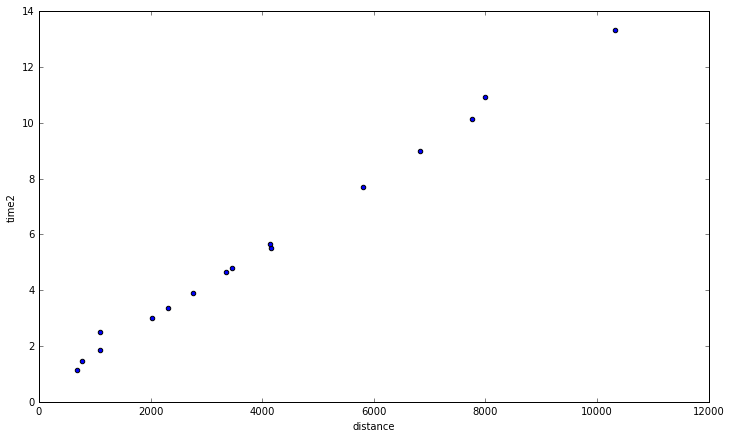

In [44]:
# plot of distance vs. converted time in hours. easy for pandas dataframes!
flighttimes.plot(x = "distance", y = "time2", kind="scatter", ylim=0, xlim=0)

## Datenbank (SQLite)

Für größere Datenmengen bzw. im professionellen/wissenschaftlichen Umfeld werden Datenbanken eingesetzt.
Die Daten werden in einem für die Datenbank spezifische Art gespeichert
(sind also nicht wie CSV Dateien von beliebigen Programmen lesbar),
beinhalten aber zusätzlich Informationen zu den Typen jeder Spalte.
Datenbanken bieten eingebaute Hilfsmittel wie Suchindizes und eine Abfragesprache,
es können mehrere Tabellen auf verschiedenste Arten verknüpft werden,
und die Verarbeitungsgeschwindigkeit ist viel höher.

Eingebaut in Python ist [`sqlite3`](https://docs.python.org/2/library/sqlite3.html).

Das folgende Beispiel speichert die Daten der CSV Datei in einer sqlite3 Datenbank und macht eine Abfrage.

1. Erstellen: lösche die gegebenenfalls existierende Datenbankdatei und befülle sie dann.

In [45]:
db_filename = join("res", "flugzeit.db")
# Löschen der Datenbank, falls sie existiert
import os
if os.path.exists(db_filename):
    os.unlink(db_filename)

In [46]:
import sqlite3
conn = sqlite3.connect(db_filename)

In [47]:
# for the connection `conn`, get a cursor and operate on the table
curs = conn.cursor

In [48]:
curs = conn.cursor()
curs.execute('''
             CREATE TABLE flugzeit
             (origin text, destination text, distance real, time real)
             ''')

In [49]:
for idx, (orig, dest, _, dist, time2) in flighttimes.iterrows():
    curs.execute("INSERT INTO flugzeit VALUES(?, ?, ?, ?)", (orig, dest, dist, time2))

In [50]:
# Hilfsfunktion: gibt die Abfrage Zeilenweise aus
def show_query(query):
    for row in query:
        out = []
        for entry in row:
            if isinstance(entry, float): out.append("{:>9.2f}".format(entry))
            elif isinstance(entry, int): out.append("{:>9d}".format(entry))
            else: out.append("{:>7s}".format(entry))
        print(" ".join(out))
                

In [51]:
show_query(curs.execute("SELECT * FROM flugzeit"))

    VIE     LHR   1100.00      2.50
    VIE     JFK   6823.00      8.98
    JFK     ZCL   3346.00      4.65
    SFO     JFK   4162.00      5.50
    PEK     ZRH   7993.00     10.92
    HNL     YOW   7758.00     10.13
    VIE     BER    676.00      1.15
    CDG     TIP   2019.00      3.02
    CDG     ATZ   3453.00      4.78
    CDG     FCO   1102.00      1.87
    VIE     FCO    780.00      1.47
    LIS     AMM   4138.00      5.65
    LIS     BER   2307.00      3.37
    LIS     WAW   2754.00      3.92
    PEK     SVO   5811.00      7.72
    BRN     HUU  10331.00     13.33


In [52]:
# sort by decreasing distance
show_query(curs.execute("SELECT * FROM flugzeit ORDER BY -distance"))

    BRN     HUU  10331.00     13.33
    PEK     ZRH   7993.00     10.92
    HNL     YOW   7758.00     10.13
    VIE     JFK   6823.00      8.98
    PEK     SVO   5811.00      7.72
    SFO     JFK   4162.00      5.50
    LIS     AMM   4138.00      5.65
    CDG     ATZ   3453.00      4.78
    JFK     ZCL   3346.00      4.65
    LIS     WAW   2754.00      3.92
    LIS     BER   2307.00      3.37
    CDG     TIP   2019.00      3.02
    CDG     FCO   1102.00      1.87
    VIE     LHR   1100.00      2.50
    VIE     FCO    780.00      1.47
    VIE     BER    676.00      1.15


In [53]:
# minimum time from each origin
show_query(curs.execute("""
             SELECT origin, destination, min(time)
             FROM flugzeit
             GROUP BY origin
             """))

    BRN     HUU     13.33
    CDG     FCO      1.87
    HNL     YOW     10.13
    JFK     ZCL      4.65
    LIS     BER      3.37
    PEK     SVO      7.72
    SFO     JFK      5.50
    VIE     BER      1.15


In [54]:
# maximum distance from LIS
curs.execute("""
             SELECT * 
             FROM flugzeit
             WHERE origin = 'LIS' AND
                   distance = (SELECT max(distance) FROM flugzeit WHERE origin = 'LIS')
             """).fetchone()

('LIS', 'AMM', 4138.0, 5.65)

## JSON

[JSON](http://www.json.org) ist eine der modernen und am weitesten verbreiteten Serialisierungssprachen.
Es handelt sich um eine von [JavaScript](http://en.wikipedia.org/wiki/JavaScript) abgeleiteten Datenstruktur,
welche nicht nur von vielen Programmiersprachen verstanden wird,
sondern auch auf einfache Art komplex verschachtelte Datenstrukturen speichern kann.
JSON (und ähnliche Serialisierungsformate) sind als einzelner großer String zu verstehen,
welche mit mehreren Syntaxzeichen (eckige Klammer, geschwungene Klammer, Doppelpunkt, ...) die Struktur definieren.

Python liefert hierfür das [json](https://docs.python.org/2/library/json.html) ([json in python 3](https://docs.python.org/3/library/json.html)) mit.

Wir bleiben bei dem Beispiel der Flugdistanzen und Konvertieren die Pandas Daten zu JSON -- in diesem Fall als Liste von assoziativen Dictionaries.

In [55]:
flighttimes_py = []
for _, data in flighttimes.iterrows():
    entry = {"orig" : data.origin,
             "dest" : data.destination,
             "dist" : data.distance, 
             "hours": data.time2 }
    flighttimes_py.append(entry)

Konvertierung der Python Datenstruktur (welche schon so gut wie JSON ist!) zu JSON.
`indent=2` ist nicht notwendig, liefert aber die hübsche Einrückung.

In [56]:
import json
flighttimes_json = json.dumps(flighttimes_py, indent=2)
print(flighttimes_json)

[
  {
    "dest": "LHR",
    "orig": "VIE",
    "dist": 1100,
    "hours": 2.5
  },
  {
    "dest": "JFK",
    "orig": "VIE",
    "dist": 6823,
    "hours": 8.983333333333333
  },
  {
    "dest": "ZCL",
    "orig": "JFK",
    "dist": 3346,
    "hours": 4.65
  },
  {
    "dest": "JFK",
    "orig": "SFO",
    "dist": 4162,
    "hours": 5.5
  },
  {
    "dest": "ZRH",
    "orig": "PEK",
    "dist": 7993,
    "hours": 10.916666666666666
  },
  {
    "dest": "YOW",
    "orig": "HNL",
    "dist": 7758,
    "hours": 10.133333333333333
  },
  {
    "dest": "BER",
    "orig": "VIE",
    "dist": 676,
    "hours": 1.15
  },
  {
    "dest": "TIP",
    "orig": "CDG",
    "dist": 2019,
    "hours": 3.0166666666666666
  },
  {
    "dest": "ATZ",
    "orig": "CDG",
    "dist": 3453,
    "hours": 4.783333333333333
  },
  {
    "dest": "FCO",
    "orig": "CDG",
    "dist": 1102,
    "hours": 1.8666666666666667
  },
  {
    "dest": "FCO",
    "orig": "VIE",
    "dist": 780,
    "hours": 1.466666666666666

`loads` läd diese Datenstruktur aus der Zeichenkette:

In [57]:
flightimes_py2 = json.loads(flighttimes_json)
print(flightimes_py2[1])

{'orig': 'VIE', 'dest': 'JFK', 'dist': 6823, 'hours': 8.983333333333333}


## YAML

[YAML](http://www.yaml.org/) ist ähnlich wie JSON ein textbasiertes, programmiersprachenunabhängiges Format zur strukturierten Speicherung von Daten.
Im Vergleich zu JSON hat es einige zusätzliche Funktionen und ist für den Menschen besser lesbar.

Im folgenden wird die externe Bibliothek [pyyaml](https://bitbucket.org/xi/pyyaml) verwendet,
um ganz analog zu JSON die Daten zuerst als String zu kodieren und dann wieder zurück zu lesen.

In [58]:
import yaml
flightimes_yaml = yaml.dump(flighttimes_py, default_flow_style=False, indent=2)
print(flightimes_yaml)

- dest: LHR
  dist: 1100
  hours: 2.5
  orig: VIE
- dest: JFK
  dist: 6823
  hours: 8.983333333333333
  orig: VIE
- dest: ZCL
  dist: 3346
  hours: 4.65
  orig: JFK
- dest: JFK
  dist: 4162
  hours: 5.5
  orig: SFO
- dest: ZRH
  dist: 7993
  hours: 10.916666666666666
  orig: PEK
- dest: YOW
  dist: 7758
  hours: 10.133333333333333
  orig: HNL
- dest: BER
  dist: 676
  hours: 1.15
  orig: VIE
- dest: TIP
  dist: 2019
  hours: 3.0166666666666666
  orig: CDG
- dest: ATZ
  dist: 3453
  hours: 4.783333333333333
  orig: CDG
- dest: FCO
  dist: 1102
  hours: 1.8666666666666667
  orig: CDG
- dest: FCO
  dist: 780
  hours: 1.4666666666666668
  orig: VIE
- dest: AMM
  dist: 4138
  hours: 5.65
  orig: LIS
- dest: BER
  dist: 2307
  hours: 3.3666666666666667
  orig: LIS
- dest: WAW
  dist: 2754
  hours: 3.9166666666666665
  orig: LIS
- dest: SVO
  dist: 5811
  hours: 7.716666666666667
  orig: PEK
- dest: HUU
  dist: 10331
  hours: 13.333333333333334
  orig: BRN



Im Gegensatz zu JSON, gibt es keine geschwungenen Klammern und sonstige besondere Auszeichnungen.
Der Bindestrich signalisiert einen neuen Eintrag und die mit Doppelpunkt getrennte Assoziation ist eine kompaktere Darstellung.

Mit wenigen Parameteränderungen gibt es aber auch ausgaben, die bis auf kleine Zeichenkodierungsunterschiede wie JSON sind.
Daher ist YAML eine Übermenge von JSON.

In [59]:
flightimes_yaml2 = yaml.dump(flighttimes_py, default_flow_style=True, indent=0)
print(flightimes_yaml2)

[{dest: LHR, dist: 1100, hours: 2.5, orig: VIE}, {dest: JFK, dist: 6823, hours: 8.983333333333333,
    orig: VIE}, {dest: ZCL, dist: 3346, hours: 4.65, orig: JFK}, {dest: JFK, dist: 4162,
    hours: 5.5, orig: SFO}, {dest: ZRH, dist: 7993, hours: 10.916666666666666, orig: PEK},
  {dest: YOW, dist: 7758, hours: 10.133333333333333, orig: HNL}, {dest: BER, dist: 676,
    hours: 1.15, orig: VIE}, {dest: TIP, dist: 2019, hours: 3.0166666666666666, orig: CDG},
  {dest: ATZ, dist: 3453, hours: 4.783333333333333, orig: CDG}, {dest: FCO, dist: 1102,
    hours: 1.8666666666666667, orig: CDG}, {dest: FCO, dist: 780, hours: 1.4666666666666668,
    orig: VIE}, {dest: AMM, dist: 4138, hours: 5.65, orig: LIS}, {dest: BER, dist: 2307,
    hours: 3.3666666666666667, orig: LIS}, {dest: WAW, dist: 2754, hours: 3.9166666666666665,
    orig: LIS}, {dest: SVO, dist: 5811, hours: 7.716666666666667, orig: PEK}, {dest: HUU,
    dist: 10331, hours: 13.333333333333334, orig: BRN}]



In [60]:
flightimes_yaml3 = yaml.dump(flighttimes_py, default_flow_style=None, indent=0)
print(flightimes_yaml3)

- {dest: LHR, dist: 1100, hours: 2.5, orig: VIE}
- {dest: JFK, dist: 6823, hours: 8.983333333333333, orig: VIE}
- {dest: ZCL, dist: 3346, hours: 4.65, orig: JFK}
- {dest: JFK, dist: 4162, hours: 5.5, orig: SFO}
- {dest: ZRH, dist: 7993, hours: 10.916666666666666, orig: PEK}
- {dest: YOW, dist: 7758, hours: 10.133333333333333, orig: HNL}
- {dest: BER, dist: 676, hours: 1.15, orig: VIE}
- {dest: TIP, dist: 2019, hours: 3.0166666666666666, orig: CDG}
- {dest: ATZ, dist: 3453, hours: 4.783333333333333, orig: CDG}
- {dest: FCO, dist: 1102, hours: 1.8666666666666667, orig: CDG}
- {dest: FCO, dist: 780, hours: 1.4666666666666668, orig: VIE}
- {dest: AMM, dist: 4138, hours: 5.65, orig: LIS}
- {dest: BER, dist: 2307, hours: 3.3666666666666667, orig: LIS}
- {dest: WAW, dist: 2754, hours: 3.9166666666666665, orig: LIS}
- {dest: SVO, dist: 5811, hours: 7.716666666666667, orig: PEK}
- {dest: HUU, dist: 10331, hours: 13.333333333333334, orig: BRN}



Zurücklesen des YAML Datensatzes in ein Python Objekt:

In [61]:
flightimes_py3 = yaml.load(flightimes_yaml)
print(flightimes_py3[1])

{'dest': 'JFK', 'orig': 'VIE', 'dist': 6823, 'hours': 8.983333333333333}


## XML

Ein sehr altes, ebenfalls programmiersprachenunabhängiges und textbasiertes, Serialisierungsformat ist
[XML](http://en.wikipedia.org/wiki/XML).
Das dahinterstehende Konzept ist ein Baum, dessen Wurzelknoten das gesamte Dokument umfasst.
Jeder Knoten kann Attribute und Kinderknoten haben.
Zwischen den Kinderknoten können auch Textknoten stehen.

Man trifft es nur noch selten an und wird am ehesten noch im Geschäftsumfeld verwendet.
Das in Python eingebaute [`xml`](https://docs.python.org/2/library/xml.html) ([`xml` in python 3](https://docs.python.org/3/library/xml.html)) modul stellt beispielsweise über das Submodul `minidom` und `etree` einfache Schnittstelle zum Verarbeiten von XML bereit.

HTML ist ähnlich zu XML, und daher sind einige Bibliotheken zum automatisierten Verarbeiten von HTML auf basis von XML konstruiert.

In [62]:
import xml.etree.ElementTree as ET

# wurzelknoten
flighttimes_xml = ET.Element("flighttimes")

for _, data in flighttimes.iterrows():
    
    ft_entry = ET.SubElement(flighttimes_xml, "flighttime")
    ft_entry.set("orig", data.origin)
    ft_entry.set("dest", data.destination)
    
    ft_distance = ET.SubElement(ft_entry, "distance")
    ft_distance.set("unit", "km")
    ft_distance.text = str(data.distance)
    
    ft_hours = ET.SubElement(ft_entry, "hours")
    ft_hours.set("unit", "hour")
    ft_hours.text = str(data.time2)

Zur schöneren Formatierung, wird das Ergebnis von `ET.tostring` noch durch `minidom`'s `toprettyxml` geschickt.

In [63]:
from xml.dom import minidom
raw_xml = ET.tostring(flighttimes_xml, "UTF-8")
flighttimes_xml_ser = minidom.parseString(raw_xml).toprettyxml(indent="  ")
print(flighttimes_xml_ser)

<?xml version="1.0" ?>
<flighttimes>
  <flighttime dest="LHR" orig="VIE">
    <distance unit="km">1100</distance>
    <hours unit="hour">2.5</hours>
  </flighttime>
  <flighttime dest="JFK" orig="VIE">
    <distance unit="km">6823</distance>
    <hours unit="hour">8.983333333333333</hours>
  </flighttime>
  <flighttime dest="ZCL" orig="JFK">
    <distance unit="km">3346</distance>
    <hours unit="hour">4.65</hours>
  </flighttime>
  <flighttime dest="JFK" orig="SFO">
    <distance unit="km">4162</distance>
    <hours unit="hour">5.5</hours>
  </flighttime>
  <flighttime dest="ZRH" orig="PEK">
    <distance unit="km">7993</distance>
    <hours unit="hour">10.916666666666666</hours>
  </flighttime>
  <flighttime dest="YOW" orig="HNL">
    <distance unit="km">7758</distance>
    <hours unit="hour">10.133333333333333</hours>
  </flighttime>
  <flighttime dest="BER" orig="VIE">
    <distance unit="km">676</distance>
    <hours unit="hour">1.15</hours>
  </flighttime>
  <flighttime dest="TI

Zurücklesen, diesmal über `minidom`:

In [64]:
flighttimes_dom = minidom.parseString(flighttimes_xml_ser)

In [65]:
ft_dom_root = flighttimes_dom.firstChild
ft_dom_node1 = ft_dom_root.childNodes[1]
print(ft_dom_node1.toxml())

<flighttime dest="LHR" orig="VIE">
    <distance unit="km">1100</distance>
    <hours unit="hour">2.5</hours>
  </flighttime>


In [66]:
ft_dom_node1.getAttribute("orig")

'VIE'

In [67]:
ft_dom_node1.getAttribute("dest")

'LHR'

Man beachte, dass hier weit mehr Aufwand getätigt werden muss und es auch keinerlei Unterstützung für Datentypen gibt.
* `.getElementsByTagName` sucht anch allen Kindknoten mit dem angegebenen Namen -- es wird mittels `[0]` das aller erste genommen.
* Von diesem Knoten aus, steigt man über `.childNodes[0]` weiter den Baum hinab, um in dieser `TextNode` dann über das `.data` Attribut endlich zu dem eigentlichen Wert zu gelangen.

In [68]:
distance_node = ft_dom_node1.getElementsByTagName("distance")[0]
unit = distance_node.getAttribute("unit")
value = int(distance_node.childNodes[0].data)
print("%d [%s]" % (value, unit))

1100 [km]


In [69]:
hours_node = ft_dom_node1.getElementsByTagName("hours")[0]
unit = hours_node.getAttribute("unit")
value = float(hours_node.childNodes[0].data)
print("%f [%s]" % (value, unit))

2.500000 [hour]


Alternativ lässt sich auch mit `.findall()` aus der ElementTree Bibliothek nach den Namen der XML-Knoten suchen:

In [71]:
ftimes_et = ET.fromstring(flighttimes_xml_ser)
for ftime in ftimes_et.findall("flighttime"):
    print("{} {} {}".format(ftime.get("orig"), ftime.get("dest"), ftime.find("distance").text))

VIE LHR 1100
VIE JFK 6823
JFK ZCL 3346
SFO JFK 4162
PEK ZRH 7993
HNL YOW 7758
VIE BER 676
CDG TIP 2019
CDG ATZ 3453
CDG FCO 1102
VIE FCO 780
LIS AMM 4138
LIS BER 2307
LIS WAW 2754
PEK SVO 5811
BRN HUU 10331


## Rastergrafiken (JPEG, PNG, etc.)

Ein Bild wird üblicherweise als Rastergrafik gespeichert.
Das heißt, es ist ein rechteckiges Array von Bildpunkten (Pixel),
denen Farbwerte oder Graustufenwerte zugewiesen werden.
Darüber hinaus werden zum Sparen von Speicherplatz diese Pixelwerte komprimiert
(d.h. es findet eine verlustbehaftete Kodierung der Information statt).

Hier nun ein Beispiel, wie ein JPEG Bild mittels `scipy.ndimage` eingelesen und dargestellt werden kann:

Hinweis: Falls es nicht funktioniert, muss das [`pillow` Module](https://python-pillow.github.io/) installiert werden
(`enpkg pillow` oder `pip install pillow`)

In [72]:
from os.path import join
import numpy as np
import scipy.ndimage as ndimage
elephant = ndimage.imread(join("res", "elephant.jpg"))

Es handelt sich um ein Bild mit 652x1107 Bildpunkten und drei Farbkanälen -- als `numpy.ndarray`!

In [73]:
elephant.shape

(652, 1107, 3)

Daten in einer Teilmatrix.
Jeder Wert gibt hier an, wie stark der rote Farbton in diesem Pixel aufgedreht werden soll (0 bis 255):

In [74]:
np.set_printoptions(linewidth = 105)
print(elephant[100:110, 500:550, 0])

[[213 192 184 210 181 179 207 222 167 191 225 223 223 224 209 202 217 220 208 204 199 209 206 226 221 206
  225 220 209 193 219 230 234 241 217 201 213 208 217 231 240 247 233 202 217 213 223 243 251 246]
 [174 194 219 200 179 193 218 232 162 200 222 208 210 206 197 209 230 221 194 184 194 220 217 238 216 194
  231 212 199 186 218 234 236 238 214 201 227 219 216 229 246 241 216 194 216 219 239 245 227 219]
 [178 203 215 189 186 206 209 201 192 202 200 196 202 195 192 211 227 208 190 199 207 215 227 224 201 206
  226 208 181 177 217 231 223 222 207 209 234 236 223 226 241 222 200 211 222 221 238 235 205 205]
 [222 221 185 194 195 216 196 167 231 206 183 197 214 203 199 214 221 202 204 238 221 202 231 204 187 225
  220 211 173 177 222 232 214 211 207 222 221 236 223 222 238 213 204 247 244 227 233 229 208 218]
 [185 192 187 211 219 211 175 212 187 196 209 178 199 210 229 225 193 184 210 232 202 195 218 228 201 193
  207 205 209 223 222 194 201 213 210 247 212 202 217 223 202 209 234 237 

Hier nun eine für den Menschen verständlichere Form:
Ein Babyelefant mit Muttertier.

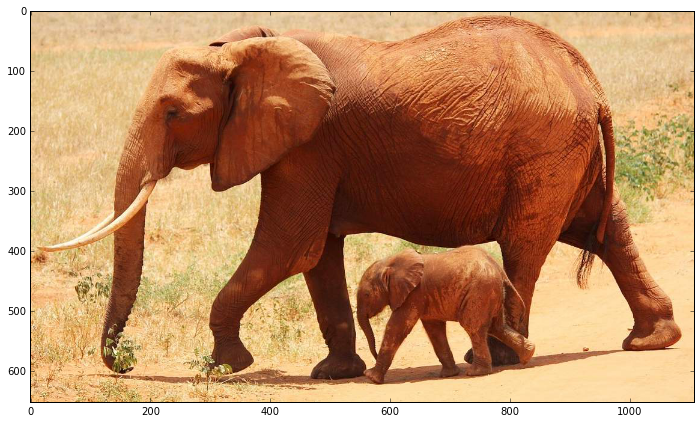

In [75]:
%config InlineBackend.figure_formats=['png']
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 7)
plt.imshow(elephant)

... oder hier nur der grüne Farbkanal einer Teilmatrix mit Spiegelung:

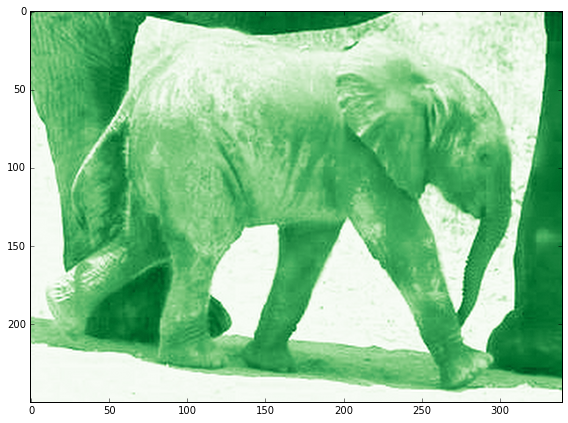

In [76]:
plt.imshow(elephant[380:630,850:510:-1,0],
           cmap=plt.cm.Greens_r,
           interpolation="lanczos")

Oder experimenteller: Der Durchschnittswert aller drei Kanäle ...

(652, 1107)


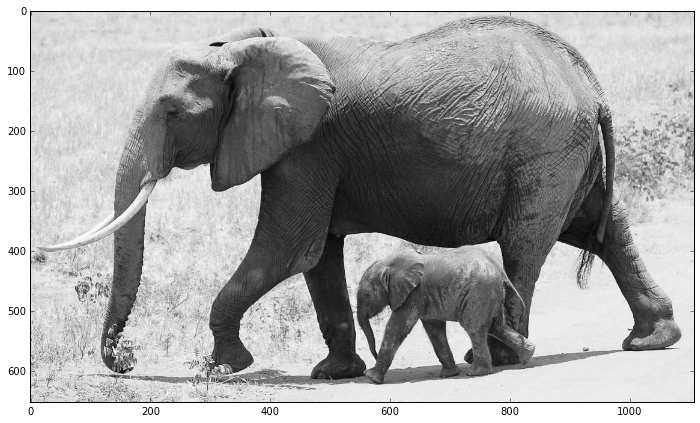

In [77]:
ele2 = np.mean(elephant, axis=2)
print(ele2.shape)
plt.imshow(ele2, cmap = plt.cm.Greys_r)

... mit Anschließender Anwendung eines
[2D Kernels über beide Dimensionen](http://docs.scipy.org/doc/scipy-dev/reference/generated/scipy.signal.convolve2d.html):

Man muss genau hinsehen was passiert: durch so einen Kernel werden Kanten mit bestimmten Kontrastwechseln herausgefiltert!

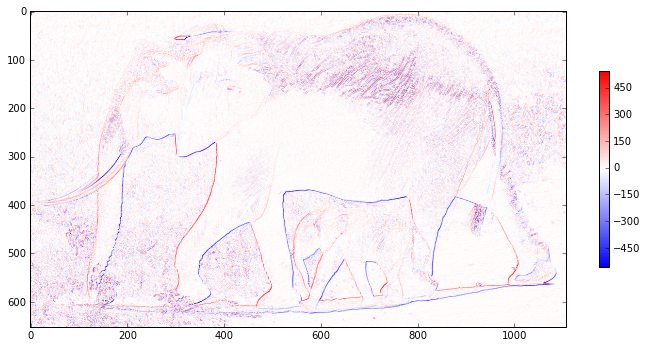

In [78]:
from scipy import signal
ckernel = np.array([[-1, -1,  0],
                    [-1,  0,  1],
                    [ 0,  1,  1]])
ele3 = signal.convolve2d(ele2, ckernel, boundary='symm', mode='same')
plt.imshow(ele3, cmap = plt.cm.bwr)
_ = plt.colorbar(shrink=.5)